<a href="https://colab.research.google.com/github/Lukew69/MAT421-homework/blob/main/Module_H_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

22.4

In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline 

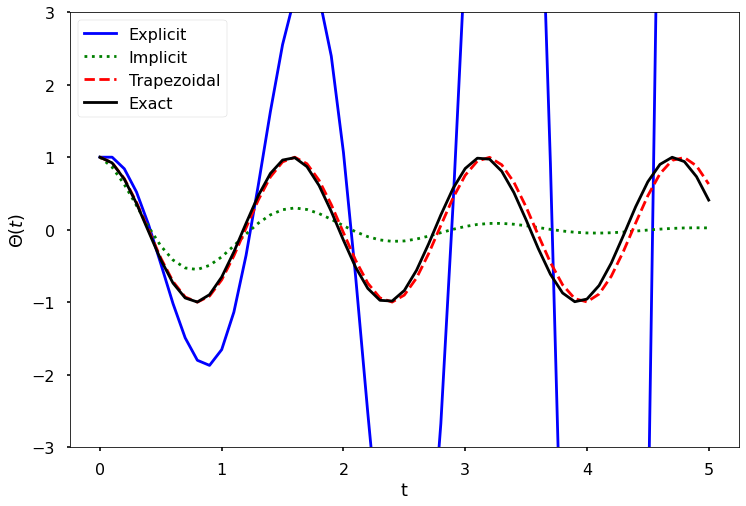

In [3]:
h = 0.1
t = np.arange(0, 5.1, h)
w = 4
s0 = np.array([[1], [0]])

m_e = np.array([[1, h], 
               [-w**2*h, 1]])
m_i = inv(np.array([[1, -h], 
               [w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2], 
    [w**2*h/2,1]])), np.array(
      [[1,h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e,s_e[j, :])
    s_i[j+1, :] = np.dot(m_i,s_i[j, :])
    s_t[j+1, :] = np.dot(m_t,s_t[j, :])
    
plt.figure(figsize = (12, 8))
plt.plot(t,s_e[:,0],'b-')
plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()

22.5

Predictor-corrector methods of solving an initial value problem improve accuracy by querying the F function several times at different points then weiging the average of the results. It uses two formulas the predictor formula and the corrector formula. The predictor is explicit and estimates t_(j+1), after finding S(t_[j+1]) we apply the corrector to improve the accuracy. 

Runge Kutta Methods are the most widley used methods for solving ODEs. Runge Kutta avoids the need to derive higher derivaties in the Euler method. The fourth-order Runge Kutta (RK4) is found from  the taylor series going out to four terms, k1, k2, k3, k4. A weighed average of these produces the approximation.

22.6

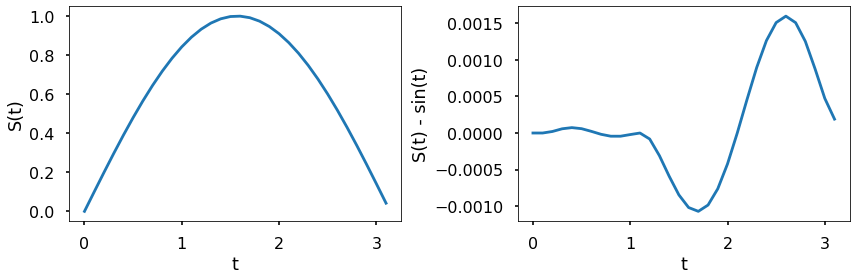

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

plt.style.use('seaborn-poster')

%matplotlib inline

F = lambda t, s: np.cos(t)

t_eval = np.arange(0, np.pi, 0.1)
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

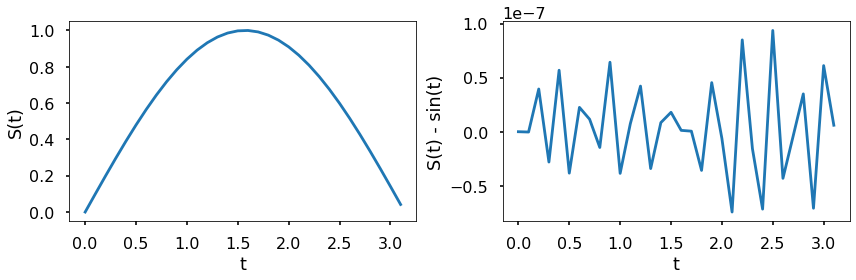

In [5]:
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval, \
                rtol = 1e-8, atol = 1e-8)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

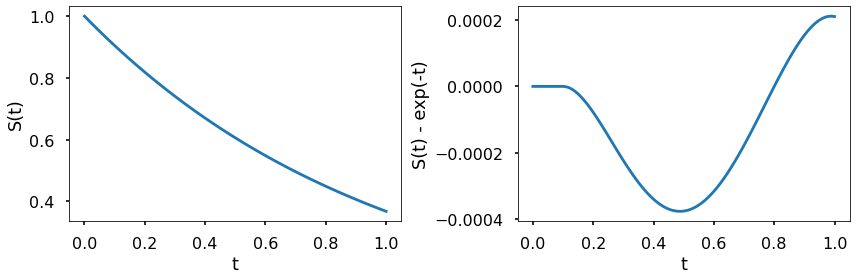

In [6]:
F = lambda t, s: -s

t_eval = np.arange(0, 1.01, 0.01)
sol = solve_ivp(F, [0, 1], [1], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.exp(-sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - exp(-t)')
plt.tight_layout()
plt.show()

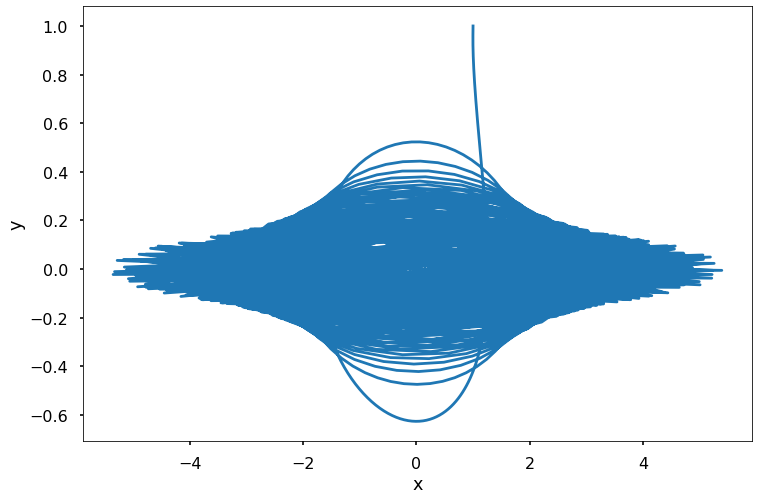

In [13]:
F = lambda t, s: np.dot(np.array([[0, t**4], [-t, 0]]), s)

t_eval = np.arange(0, 10.01, 0.01)
sol = solve_ivp(F, [0, 10], [1, 1], t_eval=t_eval)

plt.figure(figsize = (12, 8))
plt.plot(sol.y.T[:, 0], sol.y.T[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()